## Translation

In [1]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import textwrap
import matplotlib.pyplot as plt
import sentencepiece as spm
from pprint import pprint

In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)
if device == 'cuda':
    print("current_device: ", torch.cuda.current_device())

Device: cuda
current_device:  0


In [3]:
eng2spa = {}
for line in open('data/spa-eng/spa.txt', encoding='utf-8'):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)

In [4]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [5]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [6]:
from nltk.tokenize import RegexpTokenizer

In [7]:
tokenizer = RegexpTokenizer(r'\w+')

In [8]:
tokens = tokenizer.tokenize('Cómo estás'.lower())
sentence_bleu([tokens], tokens)

C:\Users\kaizi\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\kaizi\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [9]:
sentence_bleu([['hi']], ['hi'])

C:\Users\kaizi\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [10]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [11]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [12]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [13]:
# !pip install transformers sentencepiece transformers[sentencepiece]

In [14]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es", device=0)

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

C:\Users\kaizi\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\kaizi\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-en-es. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

C:\Users\kaizi\anaconda3\lib\site-packages\transformers\models\marian\tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [15]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [16]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [19]:
eng_phrases_subset = eng_phrases[20_000:20_100]

In [20]:
translations = translator(eng_phrases_subset)

In [21]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [24]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
    matches = eng2spa_tokens[eng]
    
    spa_pred = tokenizer.tokenize(pred['translation_text'].lower())
    score = sentence_bleu(matches, spa_pred)
    scores.append(score)

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 44.]),
 array([9.91889248e-232, 2.00000000e-002, 4.00000000e-002, 6.00000000e-002,
        8.00000000e-002, 1.00000000e-001, 1.20000000e-001, 1.40000000e-001,
        1.60000000e-001, 1.80000000e-001, 2.00000000e-001, 2.20000000e-001,
        2.40000000e-001, 2.60000000e-001, 2.80000000e-001, 3.00000000e-001,
        3.20000000e-001, 3.40000000e-001, 3.60000000e-001, 3.80000000e-001,
        4.00000000e-001, 4.20000000e-001, 4.40000000e-001, 4.60000000e-001,
        4.80000000e-001, 5.00000000e-001, 5.20000000e-001, 5.40000000e-001,
        5.60000000e-001, 5.80000000e-001, 6.00000000e-001, 6.20000000e-001,
        6.40000000e-001, 6.60000000e-001, 6.80000000e-001, 7.00000000e-001,
        7.20000000e-001, 7.40000

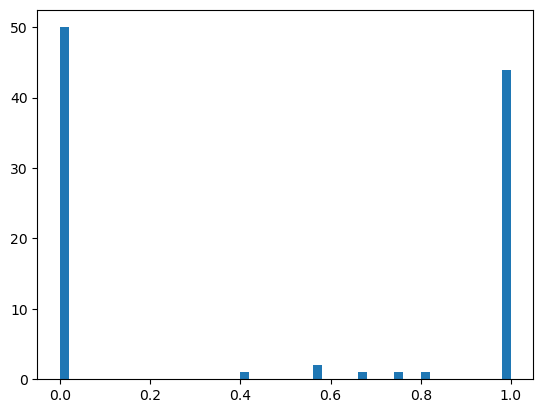

In [29]:
plt.hist(scores, bins=50)

In [27]:
np.mean(scores)

0.4780667645403358